<a href="https://colab.research.google.com/github/sprashant19/Cardiovascular-disease-prediction/blob/main/Cardiovascular_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [11]:

data=pd.read_csv("/content/cardio_train.csv",delimiter=';')
data
     

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [12]:
#Drop irrelevant column
data=data.drop(columns=['id'])
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [13]:
data.shape

(70000, 12)

In [14]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [15]:
data.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [16]:
#convert age from days to years
data['age'] = (data['age'] / 365).round().astype(int)

In [17]:
#Checking for null values, if any
data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [18]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


**Exploratory Data Analysis**

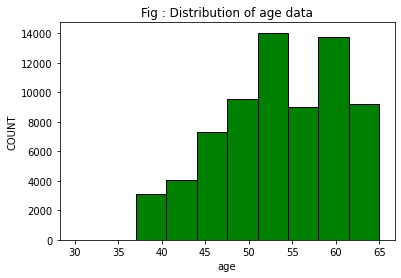

In [26]:

plt.hist(data['age'],edgecolor='black',color='green')
plt.xlabel("age")
plt.ylabel("COUNT")
plt.title("Fig : Distribution of age data")
plt.show()


Interpretation: The above Histogram depicts that people in the age group of 52 to 55 are more in our data and people in the age group of 38-40 are least in number.

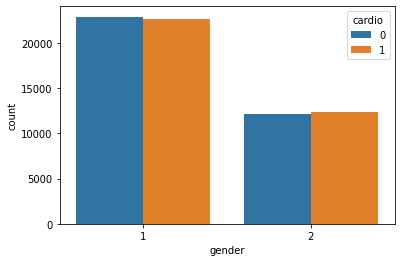

In [24]:
sns.countplot(x="gender",hue="cardio",data=data)
plt.show()
     

Interpretation: If we consider 1 as male and 2 as female. The above histogram shows that male with CVD are less than those who have CVD.Whereas the count females with CVD are less than those who have the disease. 

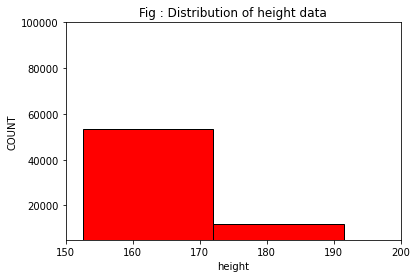

In [30]:

plt.hist(data['height'],edgecolor='black',color='red')
plt.xlabel("height")
plt.ylabel("COUNT")
plt.title("Fig : Distribution of height data")
plt.axis([150,200,5000,100000])
plt.show()
     

Interpretation : The people with height more than 172cm are less in number in our data. Most of the data is focused on people with height in between 152 and 172.

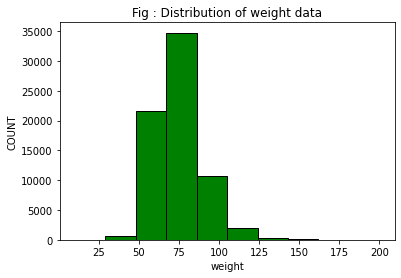

In [31]:
plt.hist(data['weight'],edgecolor='black',color='green')
plt.xlabel("weight")
plt.ylabel("COUNT")
plt.title("Fig : Distribution of weight data")
plt.show()


Interpretation: People with weight in the range of 70-87 are more in number in our data. And people with weight less than 50 and more than 125 are not covered much.

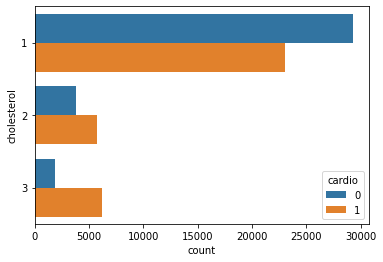

In [44]:
sns.countplot(y="cholesterol",hue="cardio",data=data)
plt.show()

Interpretation : People with normal cholesterol are more in the data and they don't have CVD. Whereas people with above normal and higher are more likely to have CVD as depicted above.



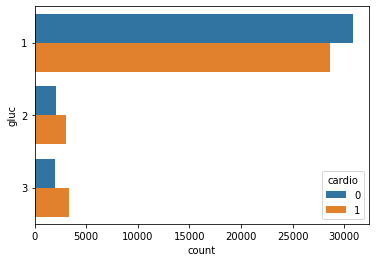

In [45]:
sns.countplot(y="gluc",hue="cardio",data=data)
plt.show()

Interpretation : People with normal Glucose are more in the data and they don't have CVD. Whereas people with above normal and higher are more likely to have CVD as depicted above.

In [48]:
x=data["smoke"].value_counts()
y=data["smoke"].unique()
fig=go.Figure(data=[go.Pie(values=x,labels=y,text=y,title="<b>Distribution of smoke data")])
fig.show()

Interpretation : People who smoke are represented less in our data, whereas people who don't smoke are more in number as depicted above.

In [49]:
x=data["alco"].value_counts()
y=data["alco"].unique()
fig=go.Figure(data=[go.Pie(values=x,labels=y,text=y,title="<b>Distribution of alco data")])
fig.show()

Interpretation : People who are alcoholic are represented less in our data, whereas people who don't consume alcohols are more in number as depicted above.

In [51]:
x=data["active"].value_counts()
y=data["active"].unique()
fig=go.Figure(data=[go.Pie(values=x,labels=y,text=y,title="<b>Distribution of Physical activity data")])
fig.show()

Interpretation : People who do some physical activity are more in number in our data as depicted above.

In [53]:
x=data["cardio"].value_counts()
y=data["cardio"].unique()
fig=go.Figure(data=[go.Pie(values=x,labels=y,text=y,title="<b>Distribution of CVD data")])
fig.show()

**Preparing the Data**

In [55]:
x = data[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active']].values
y = data["cardio"].values

**Data Splitting**

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

**Data Scaling**

In [60]:
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

***Logistic Regression***

In [61]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [62]:
log_reg.predict(x_test_scaled)

array([0, 0, 0, ..., 0, 0, 1])

In [63]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted':log_reg.predict(x_test_scaled)})
df_pred
     


,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,1,1
...,...,...
17495,0,0
17496,1,1
17497,1,0
17498,1,0


**Evaluation Metrics**

In [65]:
roc_auc_score(y_test,log_reg.predict_log_proba(x_test_scaled)[:,1])

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1402: RuntimeWarning:

divide by zero encountered in log



0.7834979229941308

AUROC score of 78% shows that our model is a good model.

**Confusion Matrix**

In [71]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, log_reg.predict(x_test_scaled))
cnf_matrix

array([[6658, 2059],
       [2868, 5915]])

**Feature Selection**

In [74]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator=LogisticRegression()
sfs=SequentialFeatureSelector(estimator,n_features_to_select=4)
sfs.fit(x_train_scaled,y_train)
list(zip(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],sfs.get_support()))

[('age', True),
 ('gender', False),
 ('height', False),
 ('weight', False),
 ('ap_hi', True),
 ('ap_lo', False),
 ('cholesterol', True),
 ('gluc', False),
 ('smoke', True),
 ('alco', False),
 ('active', False)]

Among 11 feature, if we need to select any four to predict a person will suffer from CVD then, 'age',Systolic blood pressure ('ap_hi'),Cholestrol and whether the person is non-smoker or not can be the best feature to use.